# Circular Singly Linked List

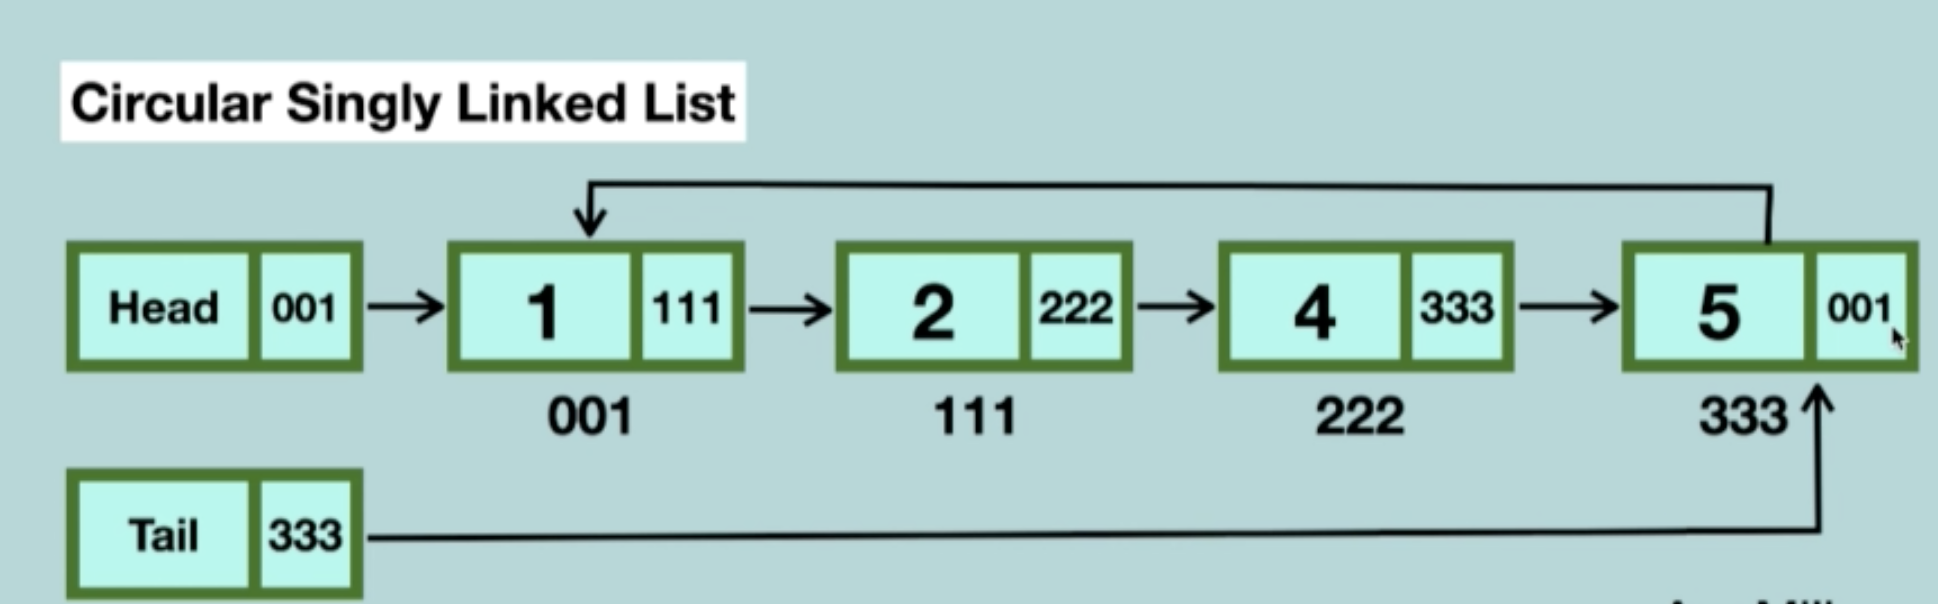

## Properties
- same as regular singly linked list, however, the last node points back to the first node
- advantages over traditional linked list:
    - useful for circular problems e.g. changing the players in a multiperson board game while the game is still being played
    - the entire list can be traversed starting from any node
    - fewer special cases since all nodes have a node before and after
- disadvantages over traditional linked list:
    - implementations that do not maintain a reference to the tail of the list will have to search for the last node in order to insert at the beginning --> time expensive
    - finding the end of the loop is more difficult -- can't simply iterate until you reach null

## Implementation 1
- reference to tail, but no count for number of nodes
- all insert and delete operations are defined within one method, would prefer to split this into separate methods similar to in a deque

In [1]:
class Node:
    def __init__(self, value=None):
        self.value = value
        self.next = None

In [63]:
class CircularSinglyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
                
    def traverse(self):
        node = self.head
        while True:
            print(node.value)
            node = node.next
            if node.next == self.head:
                print(node.value)
                break
    
    def insert(self, value, location):
        node = Node(value)
        if self.head == None and self.tail == None:
            node.next = node
            self.head = node
            self.tail = node
        else:
            if location == 0:
                node.next = self.head
                self.head = node
                self.tail.next = node
            elif location == 1:
                node.next = self.tail.next
                self.tail.next = node
                self.tail = node
            else:
                temp = self.head
                index = 0
                while index < location - 1:
                    temp = temp.next
                    index += 1
                next_node = temp.next
                temp.next = node
                node.next = next_node
        
    def search(self, value):
        temp = self.head
        index = 0
        while temp:
            if temp.value == value:
                return index
            elif temp.next == self.head:
                return -1
            else:
                temp = temp.next
                index += 1
    
    def delete(self, location):
        if self.head == self.tail:
                self.head.next = None
                self.head = None
                self.tail = None
        else:
            if location == 0:
                self.head = self.head.next
                self.tail.next = self.head
            if location == 1:
                node = self.head
                while node:
                    if node.next == self.tail:
                        break
                    node = node.next
                node.next = self.head
                self.tail = node
            else:
                node = self.head
                index = 0
                while index < location - 1:
                    node = node.next
                    index += 1
                next_node = node.next
                node.next = next_node.next
                
    def clear_list(self, location):
        self.head = None
        self.tail = None
        self.tail.next = None
                
            
            
    

## Implementation 2
- includes field for count of number of nodes
- no field to reference head only reference to tail
    - this is because head is always equal to tail.next
- splits insert and delete into separate methods

In [73]:
class Node:
    def __init__(self, data=None, next_node=None):
        self.data = data
        self.next = next_node

In [103]:
class CSLL:
    def __init__(self):
        self.last = None
        self.count = 0
    
    def traverse(self):
        temp = self.last.next
        while temp:
            print(temp.data)
            temp = temp.next
            if temp == self.last.next:
                break
                
    def append(self, value):
        temp = Node(value)
        if (self.last == None):
            self.last = temp
            self.last.next = temp
        else:
            temp.next = self.last.next
            self.last.next = temp
        self.count += 1
    
    def append_right(self, value):
        temp = Node(value)
        if (self.last == None):
            self.last = temp
            self.last.next = temp
        else:
            temp.next = self.last.next
            self.last.next = temp
            self.last = temp
        self.count += 1
    
    def insert(self, value, loc):
        if loc == self.count:
            self.append_right(value)
        elif loc == 0:
            self.append(value)
        else:
            temp = Node(value)
            node = self.last.next
            index = 0
            while index < loc-1:
                node = node.next
                index+=1
            temp.next = node.next
            node.next = temp
            self.count += 1
            
    def pop(self):
        self.last.next = self.last.next.next
        self.count -= 1
    
    def pop_right(self):
        node = self.last.next
        while node.next != self.last:
            node = node.next
        node.next = self.last.next
        self.last = node
        self.count -= 1
    
    def remove(self, loc):
        if loc == self.count:
            self.pop_right()
        elif loc == 0:
            self.pop()
        else:
            node = self.last.next
            index = 0
            while index < loc-1:
                node = node.next
                index += 1
            node.next = node.next.next
            self.count -= 1
    
    def size(self):
        return self.count


In [102]:
a = CSLL()
a.append(0)
a.append(1)
a.append(2)
a.append(3)
a.append_right(-1)
a.append_right(-2)
a.append_right(-3)
a.insert(33, 3)
a.pop()
a.pop_right()
a.remove(2)
a.traverse()

2
1
0
-1
-2


## Operations

### Traversal
- same as traversal for regular singly linked list, except break out of the loop when temp equals the head
- I implemented this using a while true loop and breaking if the temp is head to avoid issues with temp starting out as head
- possibly might be a better way to do this
- O(N) time and O(1) space

In [65]:
csll = CircularSinglyLinkedList()
csll.insert(1,0)
csll.insert(0,0)
csll.insert(2,1)
csll.insert(3,1)
csll.insert(2,2)
csll.traverse()

0
1
2
2
3


### Insert:
- insert a value at the beginning, middle, or end of the list
- O(1) worst case
    - O(1) to add the first value
    - O(1) to add to end or beginning
    - O(N) to add to location in middle of list
- O(1) space complexity

In [66]:
csll = CircularSinglyLinkedList()
csll.insert(1,0)
csll.insert(0,0)
csll.insert(2,1)
csll.insert(3,1)
csll.insert(2,2)
csll.traverse()

0
1
2
2
3


### Search
- return the index of the first instance of a given value in a list
- returns -1 if value is not found (this could be changed)
- O(n) time in this implementation (linear search)
- O(1) space
- for some reason this method is returning None rather than -1 ... I'm not sure if there is an underlying issue with the implementation that is causing this, or a problem with the search method??

In [59]:
print(csll.search(3))
print(csll.search(2))
print(csll.search(11))
# print(csll.search(33))

4
2
None


In [60]:
csll.search(11)

### Delete
- removes element at a given location from list
- O(N) time complexity
    - O(1) to remove from beginning
- O(1) space
- error with implementation when deleting last node

In [71]:
csll = CircularSinglyLinkedList()
csll.insert(1,0)
csll.insert(0,0)
csll.insert(2,1)
csll.insert(3,1)
csll.insert(2,2)
csll.traverse()
print("delete last element")
csll.delete(1)
csll.traverse()

0
1
2
2
3
delete last element
0
1
2
2


## Time and Space Complexity
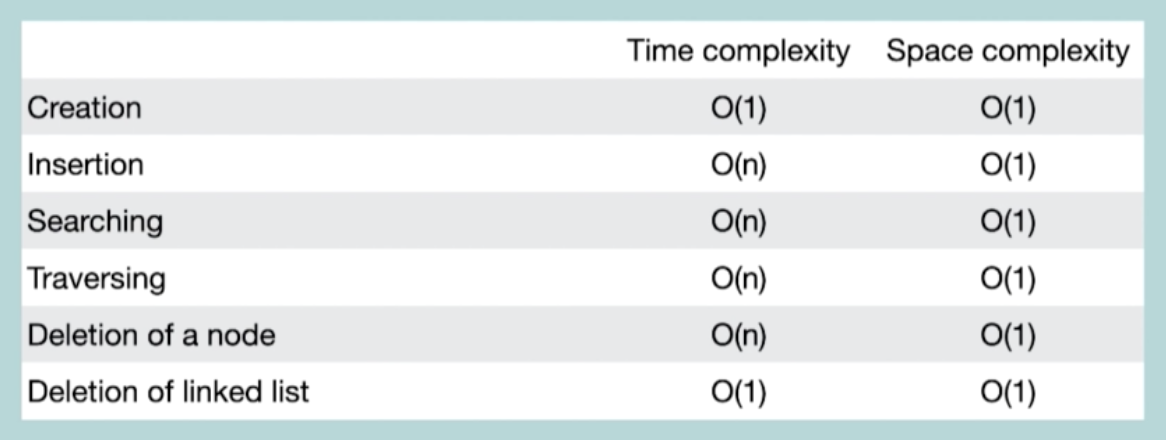